In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

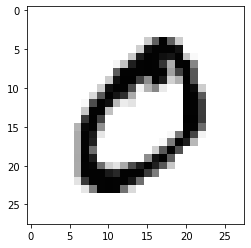

In [8]:
img=plt.imread("data/0/0_1.bmp")
plt.imshow(img,cmap=plt.cm.gray)

In [11]:
%%time
data=[]
for i in range(10):
    for j in range(1,501):
        data.append(plt.imread("data/{}/{}_{}.bmp".format(i,i,j)))
        

Wall time: 2.22 s


In [12]:
len(data)

5000

In [17]:
X=np.array(data)
X

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

In [33]:
X.shape

(5000, 28, 28)

(4000,)

In [28]:
y=[0,1,2,3,4,5,6,7,8,9]*500
y=np.array(y)
y.sort()
y

array([0, 0, 0, ..., 9, 9, 9])

In [35]:
index=np.random.randint(0,5000,size=4000)
x_train=X[index]
y_train=y[index]

index=np.random.randint(0,5000,size=1000)
x_test=X[index]
y_test=y[index]

In [37]:
y_train.shape

(4000,)

In [ ]:
# x_train.reshape(4000,784) # 784=28*28 训练的数据 必须是两维度的

In [82]:
%%time
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train.reshape(4000,-1),y_train)

Wall time: 998 µs


KNeighborsClassifier()

In [83]:
%%time
# 预测
y_=knn.predict(x_test.reshape(1000,-1))
y_[:20]

Wall time: 147 ms


array([2, 8, 9, 3, 1, 6, 5, 1, 2, 8, 1, 2, 9, 0, 7, 1, 2, 7, 2, 4])

In [84]:
y_test[:20]

array([2, 8, 9, 3, 1, 6, 5, 1, 2, 8, 1, 2, 9, 0, 7, 5, 4, 7, 2, 4])

In [86]:
(y_==y_test).mean()

0.938

In [105]:
knn=KNeighborsClassifier(n_neighbors=5,weights="distance")
knn.fit(x_train.reshape(4000,-1),y_train)
knn.score(x_test.reshape(1000,-1),y_test)

0.973

In [138]:
%%time
knn=KNeighborsClassifier(n_neighbors=5,weights="distance",n_jobs=1)
knn.fit(x_train.reshape(4000,-1),y_train)
knn.score(x_test.reshape(1000,-1),y_test)

Wall time: 155 ms


0.973

In [141]:
# 保存模型
import joblib